# Actividades Capítulo 7.


# Tratamiento de datos, estadística descriptiva y visualización de datos

## Resumen de actividades

- **Unidad 34.** Uso de módulos de Python
- **Unidad 35.** Serie Pandas para el tratamiento de datos
- **Unidad 36.** Pandas DataFrame para procesamiento de datos
- **Unidad 37.** Ordenación de datos
- **Unidad 38.** Datos de series temporales

### Nombre: Alan Palma Travez

# Actividad: Importación de módulos y su uso.


## Instrucciones

1. Importe los módulos que te permitan trabajar con fechas y tiempo (modulo datetime).

2. Use los diferentes métodos relacinados a operaciones con fechas y hora.

3. En el siguiente apartado revisa cada una las fechas contenidas en la lista e imprima el número de semanas y los dias restantes para llegar a esa fecha.

In [ ]:
# Espacio disponible para desarrollar el código y agregar los comentarios necesarios.


# Importar el módulo datetime
import datetime

# Operaciones con el módulo datetime
print("="*50)
print("Operaciones con datetime")
print("="*50)


# Fecha de hoy 
hoy = datetime.date.today()
print(f"Hoy es: {hoy}")
# Imprimir dia, mes y año
print(f"Día: {hoy.day}, Mes: {hoy.month}, Año: {hoy.year}")


# Convertir una cadena a un objeto datetime
fecha_str = '2024-06-15'
fecha_dt = datetime.datetime.strptime(fecha_str, '%Y-%m-%d')
print(f"\nFecha convertida de cadena a datetime: {type(fecha_dt)}")


# Fecha y hora actual
ahora = datetime.datetime.now()
print(f"\nFecha y hora actual: {ahora}")
print(f"Fecha y hora actual (formateada): {ahora.strftime('%d/%m/%Y %H:%M:%S')}")

# Calcular fechas pasadas y futuras
hace_10_dias = hoy - datetime.timedelta(days=10)
dentro_de_10_dias = hoy + datetime.timedelta(days=10)
print(f"\nHace 10 días fue: {hace_10_dias}")
print(f"Dentro de 10 días será: {dentro_de_10_dias}")

Operaciones con datetime
Hoy es: 2025-10-05
Día: 5, Mes: 10, Año: 2025

Fecha convertida de cadena a datetime: <class 'datetime.datetime'>

Fecha y hora actual: 2025-10-05 22:10:22.035663
Fecha y hora actual (formateada): 05/10/2025 22:10:22

Hace 10 días fue: 2025-09-25
Dentro de 10 días será: 2025-10-15


In [13]:

lista_de_fechas = ['04/01/2024', '01/28/2024', '03/16/2024', '05/24/2024', '07/30/2025']

def numero_de_semanas_y_días(fecha_str):
    """
    Función para calcular el número de semanas y días hasta esa fecha.
    Si la fecha ya pasó, devuelve semanas y días negativos.
    Inputs:
        fecha_str (str): fecha en formato 'MM/DD/YYYY'
    """
    fecha_dt = datetime.datetime.strptime(fecha_str, '%m/%d/%Y')
    delta = fecha_dt - datetime.datetime.today()
    semanas = delta.days // 7
    dias = delta.days % 7
    
    print(f"{semanas} semanas y {dias} días hasta {fecha_str}")


for fecha in lista_de_fechas:
    numero_de_semanas_y_días(fecha)

-79 semanas y 0 días hasta 04/01/2024
-89 semanas y 6 días hasta 01/28/2024
-82 semanas y 5 días hasta 03/16/2024
-72 semanas y 4 días hasta 05/24/2024
-10 semanas y 2 días hasta 07/30/2025


# Actividad: Manejo de la biblioteca Pandas.


## Instrucciones


1. Crear una serie de pandas, donde su indice este compuesto por fechas y en columna principal almace los valoras cargados en una lista.

2. Graficar los valores de la lista en función de la fecha.


In [26]:
# Importar módulos necesarios
import random
from datetime import timedelta
import pandas as pd
import matplotlib.pyplot as plt
import scienceplots

# Configurar el estilo de las gráficas
plt.style.use(['science', 'notebook', 'no-latex'])

In [31]:
# Espacio para desarrollar el código y agregar los comentarios necesarios.

precios = [140, 130, 120, 115, 160, 110, 170, 150, 157, 135]

# Crear fechas aleatorias para cada valor
fechas = [hoy - timedelta(days=random.randint(0, 30)) for _ in precios]

# Crear un diccionario con fechas y precios
datos = {fecha: precio for fecha, precio in zip(fechas, precios)}

# Crear un DataFrame
df = pd.DataFrame(list(datos.items()), columns=['Fecha', 'Precio'])
# Ordenar el DataFrame por fecha
df = df.sort_values(by='Fecha')

print("\nDataFrame de precios con fechas aleatorias:")
print(df)



DataFrame de precios con fechas aleatorias:
        Fecha  Precio
7  2025-09-05     150
5  2025-09-12     110
0  2025-09-16     140
8  2025-09-17     157
4  2025-09-19     160
2  2025-09-22     120
6  2025-09-23     170
9  2025-09-26     135
3  2025-09-30     115
1  2025-10-03     130


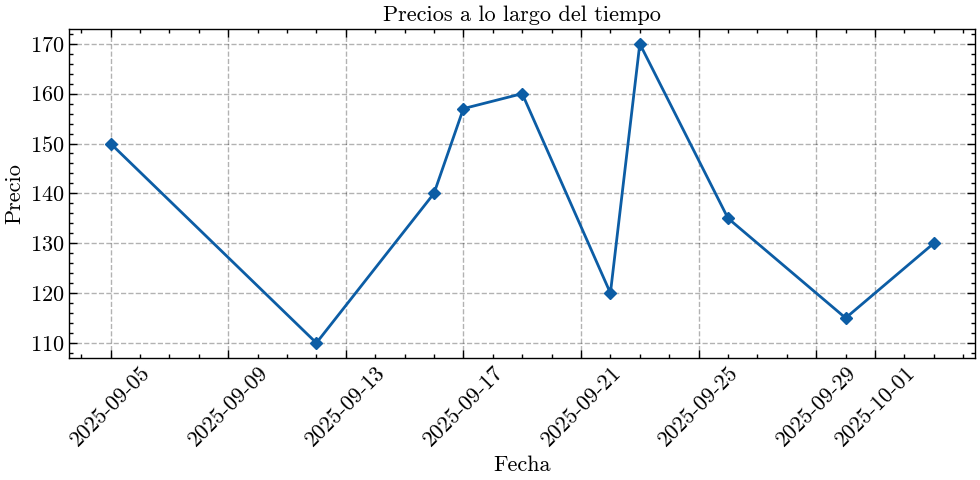

In [33]:
# Crear una gráfica de precios a lo largo del tiempo
plt.figure(figsize=(10, 5))

plt.plot(df['Fecha'], df['Precio'], marker='D')

plt.title('Precios a lo largo del tiempo')
plt.xlabel('Fecha')
plt.ylabel('Precio')

plt.grid(alpha=0.3)
plt.xticks(rotation=45)
plt.tight_layout()

plt.show()

# Actividad: Operaciones con Data Frames


## Instrucciones


1. Dado el siguiente diccionario construya un objeto DataFrame.
2. Filtre los resultados por año de publicación.
3. Obtenga algunas columnas basado en que contenga alguna palabra en el nombre de la publicacion.


In [44]:

publicaciones_literarias = {
    1605: "Don Quijote de la Mancha - Miguel de Cervantes",
    1865: "Alicia en el país de las maravillas - Lewis Carroll",
    1949: "1984 - George Orwell",
    1954: "El Señor de los Anillos - J.R.R. Tolkien",
    1997: "Harry Potter y la piedra filosofal - J.K. Rowling",
    2003: "El Código Da Vinci - Dan Brown"
}


# Espacio para desarrollar el código y agregar los comentarios necesarios.

# Crear un DataFrame a partir del diccionario 
df_libros = pd.DataFrame(list(publicaciones_literarias.items()), columns=['Año', 'Título'])

# Separar autor y título
df_libros[['Título', 'Autor']] = df_libros['Título'].str.rsplit(' - ', n=1, expand=True)
df_libros = df_libros[['Año', 'Título', 'Autor']]

print("\nDataFrame de publicaciones literarias:")
print(df_libros)


DataFrame de publicaciones literarias:
    Año                               Título                Autor
0  1605             Don Quijote de la Mancha  Miguel de Cervantes
1  1865  Alicia en el país de las maravillas        Lewis Carroll
2  1949                                 1984        George Orwell
3  1954              El Señor de los Anillos       J.R.R. Tolkien
4  1997   Harry Potter y la piedra filosofal         J.K. Rowling
5  2003                   El Código Da Vinci            Dan Brown


In [45]:
# Filtrar el DataFrame por años

# Libros publicados después del año 1950
libros_despues_1950 = df_libros[df_libros['Año'] > 1950]
print("\nLibros publicados después de 1950:")
print(libros_despues_1950)

# Libros publicados antes del año 1900
libros_antes_1900 = df_libros[df_libros['Año'] < 1900]
print("\nLibros publicados antes de 1900:")
print(libros_antes_1900)


Libros publicados después de 1950:
    Año                              Título           Autor
3  1954             El Señor de los Anillos  J.R.R. Tolkien
4  1997  Harry Potter y la piedra filosofal    J.K. Rowling
5  2003                  El Código Da Vinci       Dan Brown

Libros publicados antes de 1900:
    Año                               Título                Autor
0  1605             Don Quijote de la Mancha  Miguel de Cervantes
1  1865  Alicia en el país de las maravillas        Lewis Carroll


In [46]:
# Filtrar por palabras contenidas en el título
# Libros que contienen "Harry"
libros_harry = df_libros[df_libros['Título'].str.contains('Harry')]
print("\nLibros que contienen 'Harry' en el título:")
print(libros_harry)

# Libros que contienen "El"
libros_el = df_libros[df_libros['Título'].str.contains('El')]
print("\nLibros que contienen 'El' en el título:")
print(libros_el)


Libros que contienen 'Harry' en el título:
    Año                              Título         Autor
4  1997  Harry Potter y la piedra filosofal  J.K. Rowling

Libros que contienen 'El' en el título:
    Año                   Título           Autor
3  1954  El Señor de los Anillos  J.R.R. Tolkien
5  2003       El Código Da Vinci       Dan Brown


# Actividad: Operaciones con DataFrames.


## Instrucciones


1. Descargue el archivo ted.csv del siguiente link: https://www.kaggle.com/datasets/rounakbanik/ted-talks
 y guardelo en el mismo directorio donde está localizado el notebook.

2. Lea el archivo csv como un dataframe.

3. Muestre la cabecera o las primeras files del DataFrame.

4. Verifique el tipo de datos contenido en cada una las columnas.

5. Verifique el número de registros perdidos.

6. En una columna adicional calcule el número de comentarios entre el número de vistas.



In [48]:
# Espacio para desarrollar el código y agregar los comentarios necesarios.

# Definir la ruta del archivo CSV
path = 'sample_data/ted_main.csv'

# Cargar el archivo CSV en un DataFrame
df_ted = pd.read_csv(path)

# Imprimir las primeras filas del DataFrame
print("\nPrimeras filas del DataFrame de TED Talks:")
print(df_ted.head())


Primeras filas del DataFrame de TED Talks:
   comments                                        description  duration  \
0      4553  Sir Ken Robinson makes an entertaining and pro...      1164   
1       265  With the same humor and humanity he exuded in ...       977   
2       124  New York Times columnist David Pogue takes aim...      1286   
3       200  In an emotionally charged talk, MacArthur-winn...      1116   
4       593  You've never seen data presented like this. Wi...      1190   

     event   film_date  languages   main_speaker  \
0  TED2006  1140825600         60   Ken Robinson   
1  TED2006  1140825600         43        Al Gore   
2  TED2006  1140739200         26    David Pogue   
3  TED2006  1140912000         35  Majora Carter   
4  TED2006  1140566400         48   Hans Rosling   

                                            name  num_speaker  published_date  \
0      Ken Robinson: Do schools kill creativity?            1      1151367060   
1           Al Gore: Ave

In [50]:
# Imprimir todas las columnas del DataFrame
print("\nColumnas del DataFrame de TED Talks:")
print(df_ted.columns)

# Tipo de datos en cada columna
print("\nTipos de datos en cada columna:")
print(df_ted.dtypes)


Columnas del DataFrame de TED Talks:
Index(['comments', 'description', 'duration', 'event', 'film_date',
       'languages', 'main_speaker', 'name', 'num_speaker', 'published_date',
       'ratings', 'related_talks', 'speaker_occupation', 'tags', 'title',
       'url', 'views'],
      dtype='object')

Tipos de datos en cada columna:
comments               int64
description           object
duration               int64
event                 object
film_date              int64
languages              int64
main_speaker          object
name                  object
num_speaker            int64
published_date         int64
ratings               object
related_talks         object
speaker_occupation    object
tags                  object
title                 object
url                   object
views                  int64
dtype: object


In [51]:
# Verificar el número de registros perdidos
print("\nNúmero de registros perdidos en cada columna:")
print(df_ted.isnull().sum())


Número de registros perdidos en cada columna:
comments              0
description           0
duration              0
event                 0
film_date             0
languages             0
main_speaker          0
name                  0
num_speaker           0
published_date        0
ratings               0
related_talks         0
speaker_occupation    6
tags                  0
title                 0
url                   0
views                 0
dtype: int64


In [54]:
# Ratio entre comentario y vistas como una nueva columna
df_ted['Ratio_Comentario_Vistas'] = df_ted['comments'] / df_ted['views']
print("\nDataFrame con la nueva columna 'Ratio_Comentario_Vistas':")
print(df_ted[['comments', 'views', 'Ratio_Comentario_Vistas']].head())


DataFrame con la nueva columna 'Ratio_Comentario_Vistas':
   comments     views  Ratio_Comentario_Vistas
0      4553  47227110                 0.000096
1       265   3200520                 0.000083
2       124   1636292                 0.000076
3       200   1697550                 0.000118
4       593  12005869                 0.000049


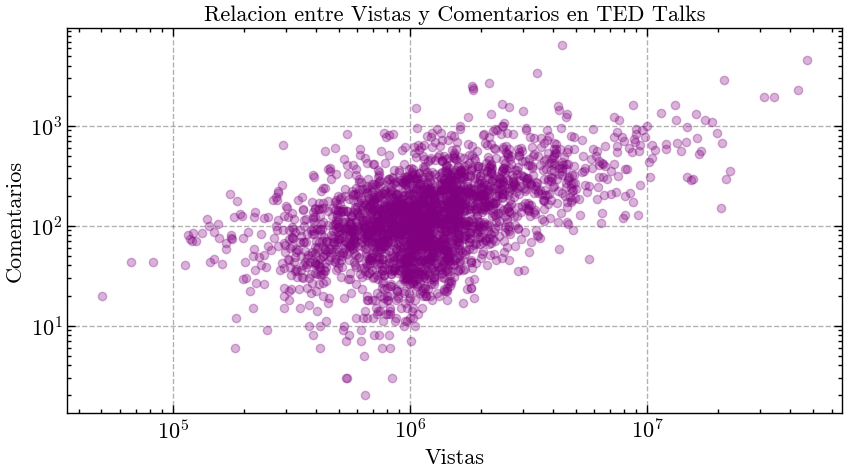

In [67]:
# Graficar la relacion entre comentarios y vistas
plt.figure(figsize=(10, 5))

plt.scatter(df_ted['views'], df_ted['comments'], color="purple", alpha=0.3)
plt.title(r'Relacion entre Vistas y Comentarios en TED Talks')

plt.xlabel('Vistas')        
plt.ylabel('Comentarios')

plt.grid(alpha=0.3)
plt.xscale('log')
plt.yscale('log')

plt.show()